<a href="https://githubtocolab.com/borislevant/python4cv/blob/main/intro_to_dl_with_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Introduction to Deep Learning

In this notebook we will start our jorney towards the Deep Learning. We will start with the Logistic Regression - remind ourselves the theory and the implementation of the Logistic Regression with the ```scikit-learn``` and then move on to learn the ```Tensorflow```. 

[![tensorflow_logo](./img/tensorflow_logo.jpeg)](https://www.tensorflow.org/)

```TensorFlow``` is an end-to-end open source platform for machine learning1. It makes it easy for beginners and experts to create machine learning models for desktop, mobile, web, and cloud2. TensorFlow supports distributed training, immediate model iteration and easy debugging with Keras, and much more2. You can also find collections of pre-trained models at TensorFlow Hub from Google and the community, or implementations of state-of-the art research models in the Model Garden2. 

In this notebook we will start with the dataset of the handwritten digits, that we already saw in the Machine learning course


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline


The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

![](./img/mnist_examples.png)

In this notebook we will use the small subset of 5000 digits images


In [3]:
# If you have an internet connection
# We can load the full data set via the Scikit-learn data_set package

# from sklearn.datasets import fetch_openml
# X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)
# X.iloc[:5000,:].to_csv('./data/mnist_7000_data.csv', index=False)
# y.iloc[:5000].to_csv('./data/mnist_7000_labels.csv', index=False)


In [4]:
X = pd.read_csv('./data/mnist_7000_data.csv', index_col=False)
y = pd.read_csv('./data/mnist_7000_labels.csv', index_col=False)
X.shape, y.shape

((5000, 784), (5000, 1))

Let's see how many different classes we have in the dataset

<AxesSubplot: >

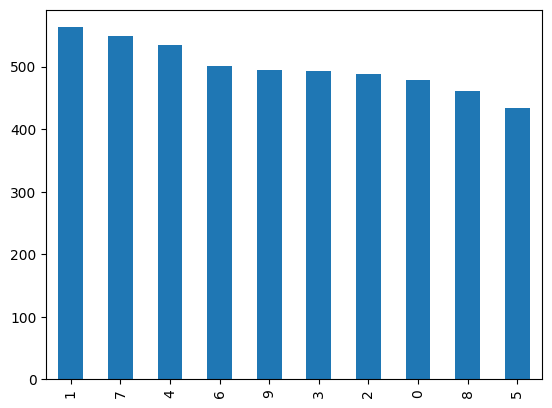

In [23]:
y['class'].value_counts().plot.bar()

Each row in X contains 784 features - representing the 28x28 pixels pictures. In order to view the pictures, we will rescale the 784 vector into the 2D matrix of 28x28 and then use the Matplotlib API for displaying the images. Let's view the first 9 images of the dataset


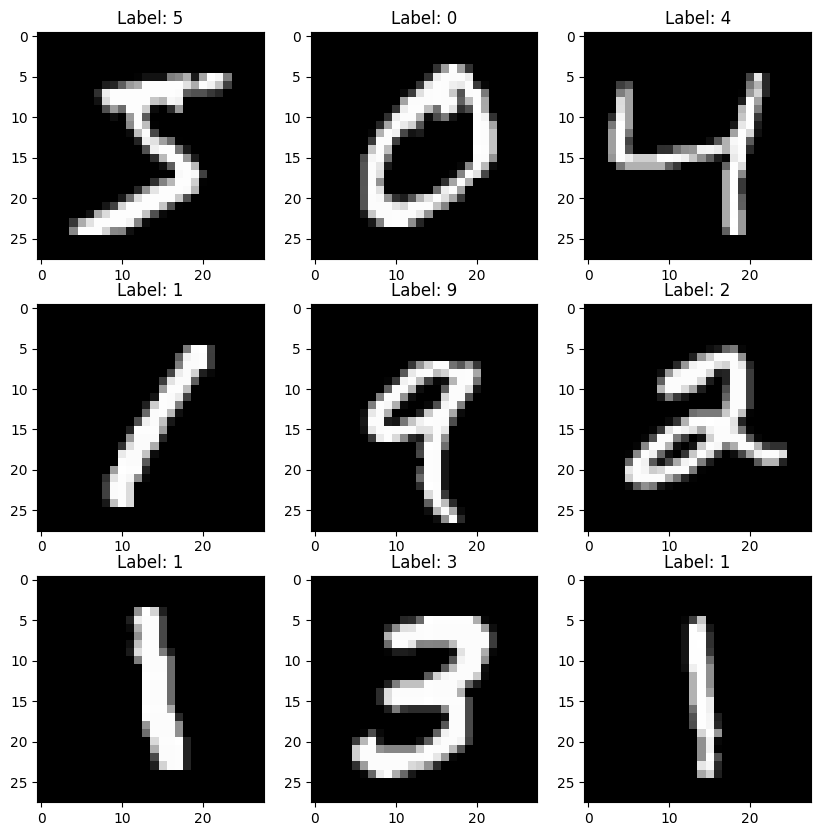

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(X.iloc[i*3+j, :].values.reshape((28, 28)), cmap='gray')
        ax[i, j].set_title(f'Label: {y.iloc[i*3+j, 0]}')

## Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

The outcome of the Logistic Regression is the vector of length equals to the number of classes that we want to predict. In our case it's 10 - digits from 0 to 9. The value of the vector at the `i`-th coordinate indicates the probability of the the sample to be of class `i`
$$
v[i]=P(y=i|X)
$$

When we train the Logistic regression model, we try to estimate the probability $p_k$ that a data sample (image) belongs to class $k$ (digit $k$):
$$
p_k = \frac{1}{1+e^{-z_k}} \\
z_k = a_{1,k} x_1 + \ldots + a_{m,k} x_m
$$
where $x_j$ is pixel $j$ and $a_{j,k}$ is the increase in favor of class $k$ when pixel $j$ is dark.

In this case the loss function we minimize is *not* the sum of residual squares, but rather the **cross-entropy**:
$$
loss(p, y) = \sum_{i=1}^{n}{\sum_{k=0}^{9}{y_{i,k} \log{p_{i,k}}}}
$$
where $i$ is the image index ($n$ images overall), $k$ is the digit (i.e. class), $y_{i,k}=1$ if image $i$ is of digit $k$ and $y_{i,k}=0$ otherwise, and $p_{i,k}$ is the model prediction about the probability that image $i$ is of digit $k$.

Before training the model, let's split the data into `train` and `test` sets 

In [47]:
n_train = 4500
X_train = X.values[:n_train, :]
X_test = X.values[n_train:, :]
y_train = y.values.ravel()[:n_train]
y_test = y.values.ravel()[n_train:]

In this part we will rescale the features of the model - dividing it by 255 (the largest possible value of the pixel) to bring everythiong into the range of 0 to 1

In [48]:
X_train = X_train / 255
X_test = X_test / 255


In [49]:
clf = linear_model.LogisticRegression(random_state=0).fit(X_train, y_train)
print(f'Trian accuracy of the model: {clf.score(X_train, y_train)}')
print(f'Test accuracy of the model: {clf.score(X_test, y_test)}')

Trian accuracy of the model: 0.9886666666666667
Test accuracy of the model: 0.902


C:\Users\levan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In the case of the classification models, the accuracy of the model is defined as
$$
\frac{\text{The number of correct predictions}}{\text{Overall number of examples}}
$$

One already observes that our model **overfits** - namely it performs perfect on the train set, but ones we give it a test set - examples it didn't see during the train, it performs much worse: only **89.2%**

### Excercise 1

Implement the function that caclulates the accuracy of the classifier
```
def accuracy(y_labels, y_predicted):
    return np.average(y_labels == y_predicted)
```
Verify that the function calculates the same values for the `clf` model
```
accuracy(y_test, clf.predict(X_test))
```

In order to show the in-correctly classified examples, we can use the following

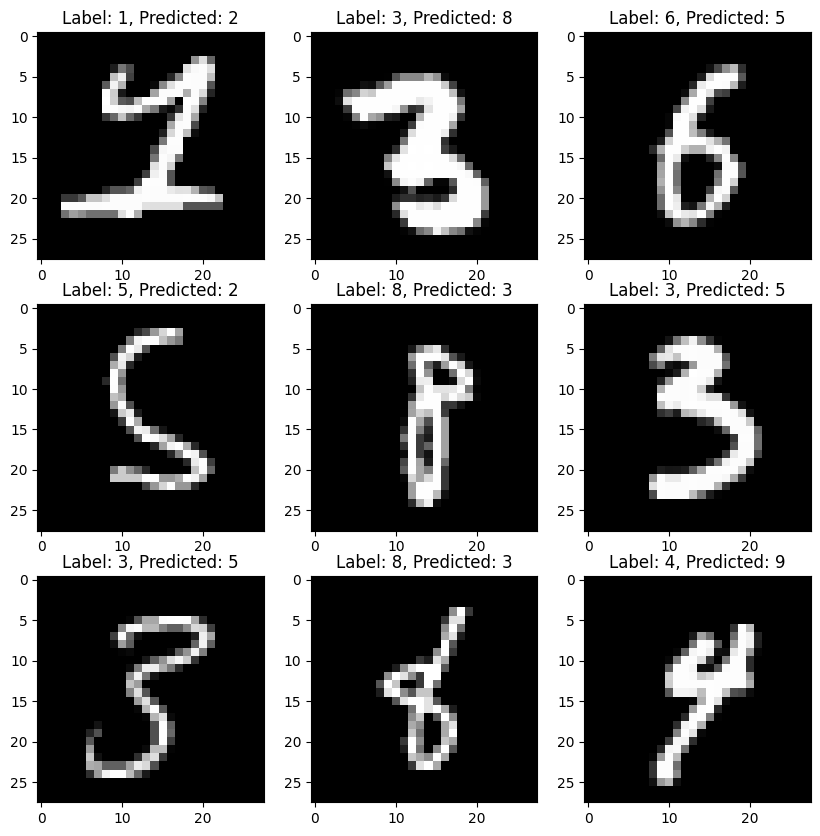

In [50]:
y_predicted = clf.predict(X_test)
X_test_wrong = X_test[y_predicted != y_test]
y_test_wrong = y_test[y_predicted != y_test]
y_predicted_wrong = y_predicted[y_predicted != y_test]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(X_test_wrong[i*3+j, :].reshape((28, 28)), cmap='gray')
        ax[i, j].set_title(f'Label: {y_test_wrong[i*3+j]}, Predicted: {y_predicted_wrong[i*3+j]}')


### Visualizing the models weights

Remember, that the Logistic regression model is just the weights of the size of the picture - 784, and we different weights for each of the classes. So we can visualize the weights for each class in the following way


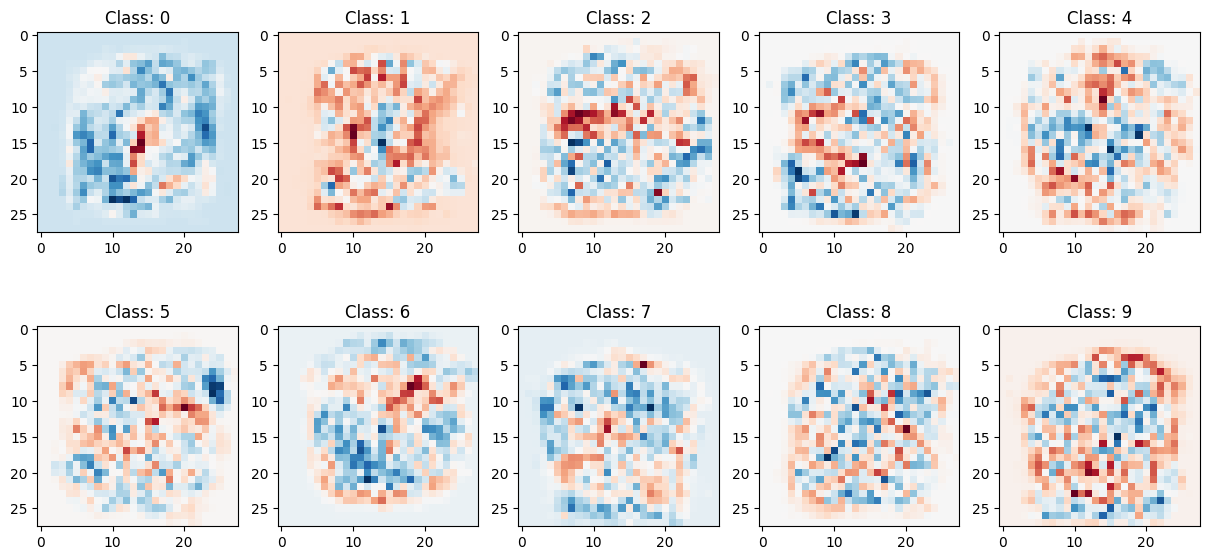

In [51]:
coef = clf.coef_
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(coef[i*5+j, :].reshape((28, 28)), cmap=plt.cm.RdBu)
        ax[i, j].set_title(f'Class: {i*5+j}')


## Tensorflow: Our first Neural Network

In this part we will learn about the ```Tensorflow```. Our first goal is to implement the Logistic regression using the library and imrpove the result of the detection

To install ```Tensorflow``` run the following
```
pip install tensorflow
```

Instead of writing the pure Tensorflow code, we will use the common ```Keras``` high-level API that wraps the functionality of the package.


In [52]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer

num_classes=10

We will use the Sequential API of Keras. A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

* The first layer of the Network accepts the image. So we initialize it as accepting the images of the size of the MNIST images - in this case array of the length 784
* The second layer of the Network is just the softmax layer - making the classification

This architecture is equivalent to the simple Logistic regression as we built before with scikit-learn


In [77]:
model = Sequential()
model.add(InputLayer(input_shape=X_train.shape[1:]))
model.add(Dense(num_classes, activation='softmax'))


The arcitecture looks like the following:

[![logistic_network](./img/logistic_network.png)](https://www.tensorflow.org/)

The images were already transoformed to the vectors. The output of the network is a vector of 10 numbers. The matrix W that we actually learn is the matrix of the size 10x784 - transforming the input of 784 numbers into vector of 10. The bias vector b is of size 10. Therefore, we have the total paramters of the network to learn:
$$
784*10 + 10 = 7850
$$
as is estimated in the output of the function ```summary```.



In [78]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Each i of the vector representing the "probability" that the input image is classified as a number i. Therefore, in order to use the original labels we need to convert the numbers 0, 1, 2, ..., 9 of the y_test/y_train into the one-hot encoding vectors, where the 0 corresponds to the vector $[1, 0, 0, 0, ..., 0]$, etc.


In [79]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)


Now it's time to train the network. We do it by the following steps:

* Compiling the model, defining the optimizer to use (in this case - Stochastic gradient descent) and the metric to use to converge
* Fitting the model by calling the function ```fit``` with the batch size, number of epochs
* Saving the model (into the file of type hdf5) and the history of the train into the CSV file


In [80]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat,
              batch_size=32,
              epochs=20,
              validation_data=(X_test, y_test_cat),
              shuffle=True)

model.save(r'./data/model_softmax', save_format='h5')
pd.DataFrame(history.history).to_csv('./data/history_softmax.csv')


Epoch 1/20
141/141 [==============================] - 1s 3ms/step - loss: 1.7458 - accuracy: 0.5331 - val_loss: 1.3168 - val_accuracy: 0.7500
Epoch 2/20
141/141 [==============================] - 0s 2ms/step - loss: 1.1461 - accuracy: 0.7787 - val_loss: 0.9815 - val_accuracy: 0.8160
Epoch 3/20
141/141 [==============================] - 0s 2ms/step - loss: 0.9015 - accuracy: 0.8236 - val_loss: 0.8225 - val_accuracy: 0.8340
Epoch 4/20
141/141 [==============================] - 0s 2ms/step - loss: 0.7718 - accuracy: 0.8413 - val_loss: 0.7302 - val_accuracy: 0.8440
Epoch 5/20
141/141 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.8531 - val_loss: 0.6684 - val_accuracy: 0.8600
Epoch 6/20
141/141 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.8613 - val_loss: 0.6267 - val_accuracy: 0.8580
Epoch 7/20
141/141 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.8673 - val_loss: 0.5932 - val_accuracy: 0.8580
Epoch 

Observe that the Network reaches the accuracy of **90%** on train and **86%** on the test. What can be done to improve?

* Increase the number of epochs
* ...


## FNN - Fully connected Neural Network

Let's try to make a Netowrk more complex, by adding the new Fully connected layers


In [81]:
model_fnn = Sequential()
model_fnn.add(InputLayer(input_shape=X_train.shape[1:]))
model_fnn.add(Dense(256, activation='relu'))
model_fnn.add(Dense(128, activation='relu'))
model_fnn.add(Dense(64, activation='relu'))
model_fnn.add(Dense(num_classes, activation='softmax'))
model_fnn.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 256)               200960    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [82]:
model_fnn.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

history_fnn = model_fnn.fit(X_train, y_train_cat,
              batch_size=32,
              epochs=20,
              validation_data=(X_test, y_test_cat),
              shuffle=True)

model_fnn.save(r'./data/model_softmax_fnn', save_format='h5')
pd.DataFrame(history_fnn.history).to_csv('./data/history_softmax_fnn.csv')


Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 2.0324 - accuracy: 0.4111 - val_loss: 1.6449 - val_accuracy: 0.6300
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 1.2642 - accuracy: 0.6958 - val_loss: 0.9181 - val_accuracy: 0.7660
Epoch 3/20
141/141 [==============================] - 0s 3ms/step - loss: 0.7446 - accuracy: 0.8224 - val_loss: 0.6350 - val_accuracy: 0.8220
Epoch 4/20
141/141 [==============================] - 0s 3ms/step - loss: 0.5412 - accuracy: 0.8604 - val_loss: 0.5117 - val_accuracy: 0.8420
Epoch 5/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.8789 - val_loss: 0.4610 - val_accuracy: 0.8680
Epoch 6/20
141/141 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8958 - val_loss: 0.4105 - val_accuracy: 0.8740
Epoch 7/20
141/141 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.9064 - val_loss: 0.3884 - val_accuracy: 0.8840
Epoch 

Observe that the Network reaches the accuracy of **96%** on train and **92%** on the test. A huge improvemnt! What can be done to improve?

* Increase the number of epochs
* ...


## Summary

We built the 2 Neural Networks: a simple 1 layer and an FNN with 3 layers. Let's plot the graphs of accuracy of both models. Let's see what is the objecto of history


In [85]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

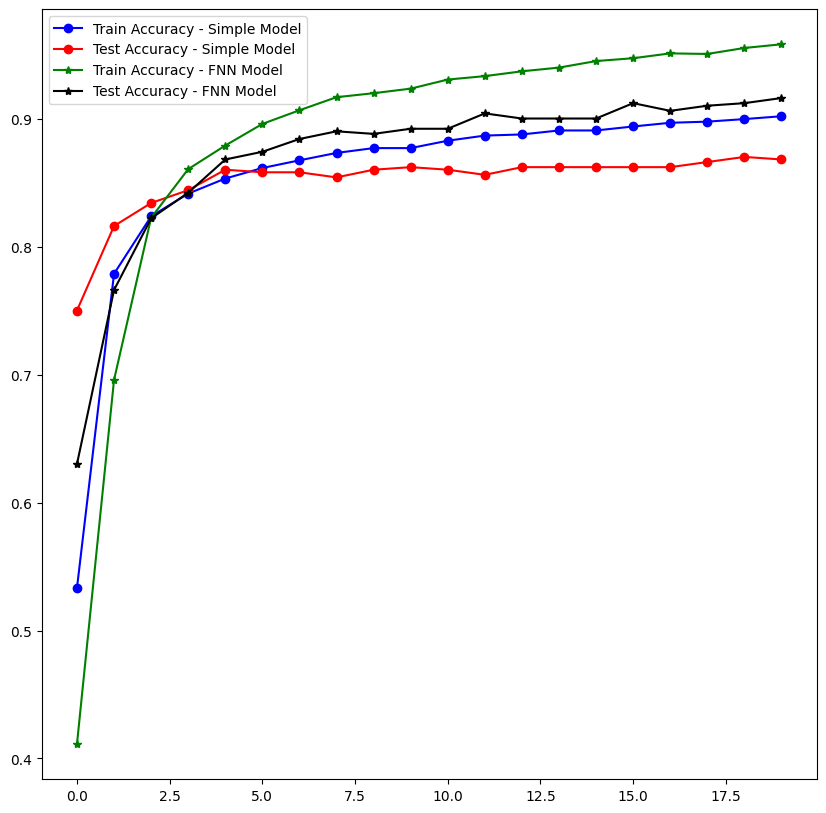

In [94]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], 'bo-', label='Train Accuracy - Simple Model')
plt.plot(history.history['val_accuracy'], 'ro-', label='Test Accuracy - Simple Model')
plt.plot(history_fnn.history['accuracy'], 'g*-', label='Train Accuracy - FNN Model')
plt.plot(history_fnn.history['val_accuracy'], 'k*-', label='Test Accuracy - FNN Model')
plt.legend()

### Excercise 2

Try to improve the result with the FNN by 

* Adding more layers
* Changing the optimizer to Adam
* Increasing the number of epochs


# References

- Scikit-learn [supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html).
- [Tuning meta-parameters](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) with cross validation.
- [One of the best notebooks for ML](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook)

# Futher exercise

- [Regression with a linear model](../exercises/linear-model.ipynb)
- [Classification with a logistic model](../exercises/logistic-tennis.ipynb)